In [ ]:
!pip install category_encoders
!pip install regressors

In [ ]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from category_encoders import LeaveOneOutEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn import linear_model
from regressors import stats
import regressors
from math import log
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:,}'.format
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Task 1**

### **1. Data Frame :**

DataFrame is a two-dimensional data structure in which the data is organized in rows and columns in a tabular format. As they're a flexible and responsive way of storing and working with data, DataFrames are one of the most commonly used data structures in modern data analytics. Pandas DataFrames makes it simple to manipulate a dataset. One of the most widely used libraries for data analysis and manipulation is the standard Python library pandas. Pandas is a programming language that converts data into a structured format called a DataFrame, which can be used for a variety of operations and analytics. The DataFrames assist in formatting the data into a neat table that is easy to read and manipulate.


In [ ]:
# 2. Data Frame df
# dataset 1 --> performance in Portuguese language (por)
data_frame_1 = pd.read_csv('/content/drive/MyDrive/Data Science/student-por.csv',sep=";") 

# dataset 2 --> performance in Mathematics (mat)
data_frame_2 = pd.read_csv('/content/drive/MyDrive/Data Science/student-mat.csv',sep=";") 

# merging tow dataset
df = pd.concat([data_frame_1,data_frame_2])
df = df[~df.index.duplicated()]
df['Average Grades'] = df[['G1', 'G2', 'G3']].mean(axis='columns')
# 3. Size of the data table.
print('\n','dataset size:', df.shape)

# 4. column names.
print('\n', 'Column Name:',df.columns)

# 5. data types of the columns
print('\n', 'Data Types:','\n',df.dtypes)



 dataset size: (649, 34)

 Column Name: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Average Grades'],
      dtype='object')

 Data Types: 
 school             object
sex                object
age                 int64
address            object
famsize            object
Pstatus            object
Medu                int64
Fedu                int64
Mjob               object
Fjob               object
reason             object
guardian           object
traveltime          int64
studytime           int64
failures            int64
schoolsup          object
famsup             object
paid               object
activities         object
nursery            object
higher             o

### **Dealing with null/missing values**



In [ ]:
# 6. Finding null/missing values.
print("\n checking missing values in variables\n",df.isnull().any())

print('\n No of missing value \n',df.isnull().sum())


 checking missing values in variables
 school            False
sex               False
age               False
address           False
famsize           False
Pstatus           False
Medu              False
Fedu              False
Mjob              False
Fjob              False
reason            False
guardian          False
traveltime        False
studytime         False
failures          False
schoolsup         False
famsup            False
paid              False
activities        False
nursery           False
higher            False
internet          False
romantic          False
famrel            False
freetime          False
goout             False
Dalc              False
Walc              False
health            False
absences          False
G1                False
G2                False
G3                False
Average Grades    False
dtype: bool

 No of missing value 
 school            0
sex               0
age               0
address           0
famsize           0
Pstatus 

In [ ]:
# 7. Droping duplicate rows, or missing values (if there is any)
print(df.drop_duplicates())

    school sex  age address famsize  ... absences  G1  G2  G3     Average Grades
0       GP   F   18       U     GT3  ...        4   0  11  11  7.333333333333333
1       GP   F   17       U     GT3  ...        2   9  11  11 10.333333333333334
2       GP   F   15       U     LE3  ...        6  12  13  12 12.333333333333334
3       GP   F   15       U     GT3  ...        0  14  14  14               14.0
4       GP   F   16       U     GT3  ...        0  11  13  13 12.333333333333334
..     ...  ..  ...     ...     ...  ...      ...  ..  ..  ..                ...
644     MS   F   19       R     GT3  ...        4  10  11  10 10.333333333333334
645     MS   F   18       U     LE3  ...        4  15  15  16 15.333333333333334
646     MS   F   18       U     GT3  ...        6  11  12   9 10.666666666666666
647     MS   M   17       U     LE3  ...        6  10  10  10               10.0
648     MS   M   18       R     LE3  ...        4  10  11  11 10.666666666666666

[649 rows x 34 columns]


In [ ]:
# 9. Get data only from a particular column
print("Getting data from age column \n",df.age)
print("Getting data from guardian column \n",df.guardian)

Getting data from age column 
 0      18
1      17
2      15
3      15
4      16
       ..
644    19
645    18
646    18
647    17
648    18
Name: age, Length: 649, dtype: int64
Getting data from guardian column 
 0      mother
1      father
2      mother
3      mother
4      father
        ...  
644    mother
645    mother
646    mother
647    mother
648    mother
Name: guardian, Length: 649, dtype: object


In [ ]:
# 10. Count different column values.
df.nunique()

school             2
sex                2
age                8
address            2
famsize            2
Pstatus            2
Medu               5
Fedu               5
Mjob               5
Fjob               5
reason             4
guardian           3
traveltime         4
studytime          4
failures           4
schoolsup          2
famsup             2
paid               2
activities         2
nursery            2
higher             2
internet           2
romantic           2
famrel             5
freetime           5
goout              5
Dalc               5
Walc               5
health             5
absences          24
G1                17
G2                16
G3                17
Average Grades    48
dtype: int64

## **Observations (Task 1):**

This dataset contains information about the performance of some Portuguese secondary school students as well as personal information about them. It was used to see if it could be traced back to what factors most influenced a Portuguese boy's school performance in the two main subjects Mathematics and Portuguese language.


*** The dataset about Mathematics has 395 rows and 33 columns and has no missing values.** <br>
***The dataset about Portuguese language has 649 rows and 33 columns and has no missing values.**

# **Task 2**

### **1. contents of the dataset :**

This dataset is based on two Portuguese secondary schools' student achievement. The data was gathered using school reports and questionnaires and includes student grades, demographic, social, and school-related characteristics. There are two datasets available, one for mathematics (mat) and the other for Portuguese language performance (por). Both datasets were modeled using binary/five-level classification and regression tasks.<br>
In this dataset, G3 is the target attribute, and it has a strong correlation with G2 and G1. This is due to the fact that G3 is the final year grade (issued during the third period), whereas G1 and G2 are the first and second period grades. Predicting G3 without G2 and G1 is more difficult, but it is much more useful.



### **2. Ploting Various aspects of the features (Distribution, Correlation, Range, Visual Distribution, Trends in Data)**

In [ ]:
import seaborn as sns
#describing the dataset
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Average Grades
count,649.0,649.0,649.0,649.0,649.0,649.0,649.0,649.0,649.0,649.0,649.0,649.0,649.0,649.0,649.0,649.0,649.0
mean,16.7442218798151,2.514637904468413,2.3066255778120186,1.568567026194145,1.9306625577812018,0.2218798151001541,3.930662557781202,3.180277349768875,3.184899845916795,1.50231124807396,2.280431432973806,3.536209553158706,3.6594761171032357,11.399075500770415,11.570107858243452,11.906009244992296,11.625064201335395
std,1.2181376394800618,1.1345519999533142,1.099930911140804,0.748660086353414,0.8295095746366191,0.5932351492649646,0.9557168913381906,1.0510925753570612,1.175766113842308,0.9248344305673313,1.2843799719490272,1.4462590500910721,4.640758808397126,2.745265128446369,2.913638664303868,3.2306562428048045,2.8333602819138552
min,15.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.3333333333333333
25%,16.0,2.0,1.0,1.0,1.0,0.0,4.0,3.0,2.0,1.0,1.0,2.0,0.0,10.0,10.0,10.0,10.0
50%,17.0,2.0,2.0,1.0,2.0,0.0,4.0,3.0,3.0,1.0,2.0,4.0,2.0,11.0,11.0,12.0,11.666666666666666
75%,18.0,4.0,3.0,2.0,2.0,0.0,5.0,4.0,4.0,2.0,3.0,5.0,6.0,13.0,13.0,14.0,13.333333333333334
max,22.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,32.0,19.0,19.0,19.0,18.666666666666668


In [ ]:
def plot_corr(df, annot=True):
    _, ax = plt.subplots(figsize=(16, 12))
    sns.heatmap(
        df.corr(),
        annot=annot,
        cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
        ax=ax
    )


def plot_histplot(column):
    sns.histplot(x=column, color='#65b87b', alpha=.7) 
    
    
def plot_countplot(df, column_name, ax=None):
    _df = df[[column_name]].copy()
    if len(_df[_df[column_name].isnull()]):
        _df.fillna('NaN', inplace=True)
    
    color = '#42b0f5' if ax != None else '#7661ff'
    sns.countplot(x=column_name, data=_df, color=color, alpha=.7, ax=ax)
    del _df

## **Normal Distribution**

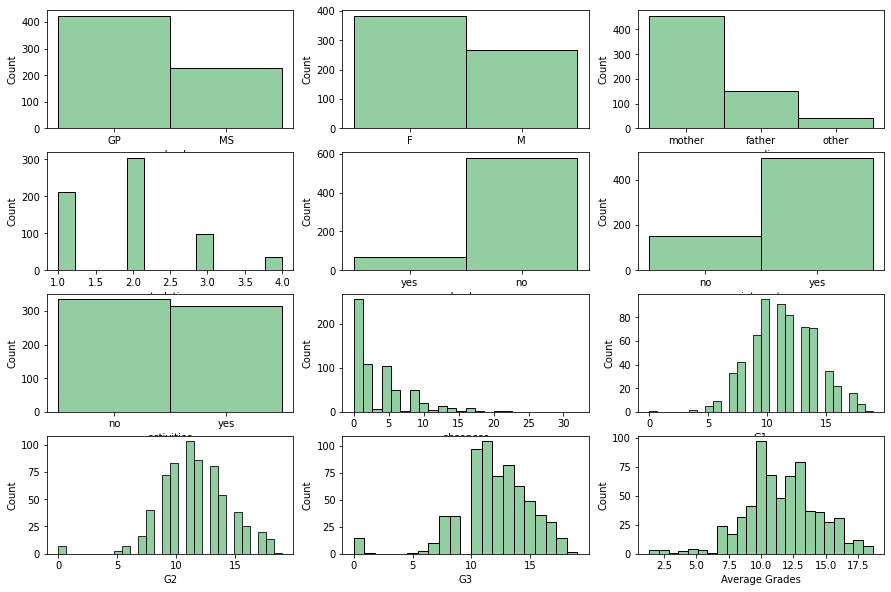

In [ ]:
# Normal Distribution of different attributes
plt.figure(figsize=(15,10))
plt.subplot(4,3,1);
plot_histplot(df['school'])

plt.subplot(4,3,2); 
plot_histplot(df['sex'])

plt.subplot(4,3,3); 
plot_histplot(df['guardian'])

plt.subplot(4,3,4); 
plot_histplot(df['studytime'])

plt.subplot(4,3,5); 
plot_histplot(df['schoolsup'])

plt.subplot(4,3,6); 
plot_histplot(df['internet'])

plt.subplot(4,3,7); 
plot_histplot(df['activities'])

plt.subplot(4,3,8); 
plot_histplot(df['absences'])

plt.subplot(4,3,9); 
plot_histplot(df['G1'])

plt.subplot(4,3,10); 
plot_histplot(df['G2'])

plt.subplot(4,3,11); 
plot_histplot(df['G3'])

plt.subplot(4,3,12); 
plot_histplot(df['Average Grades'])

## **Continues Features Distribution:**
We'll approach this data in different ways because it's discrete. We'll make multiple plots for each column to learn more about continuous data. Each plot includes various information from which we can learn.


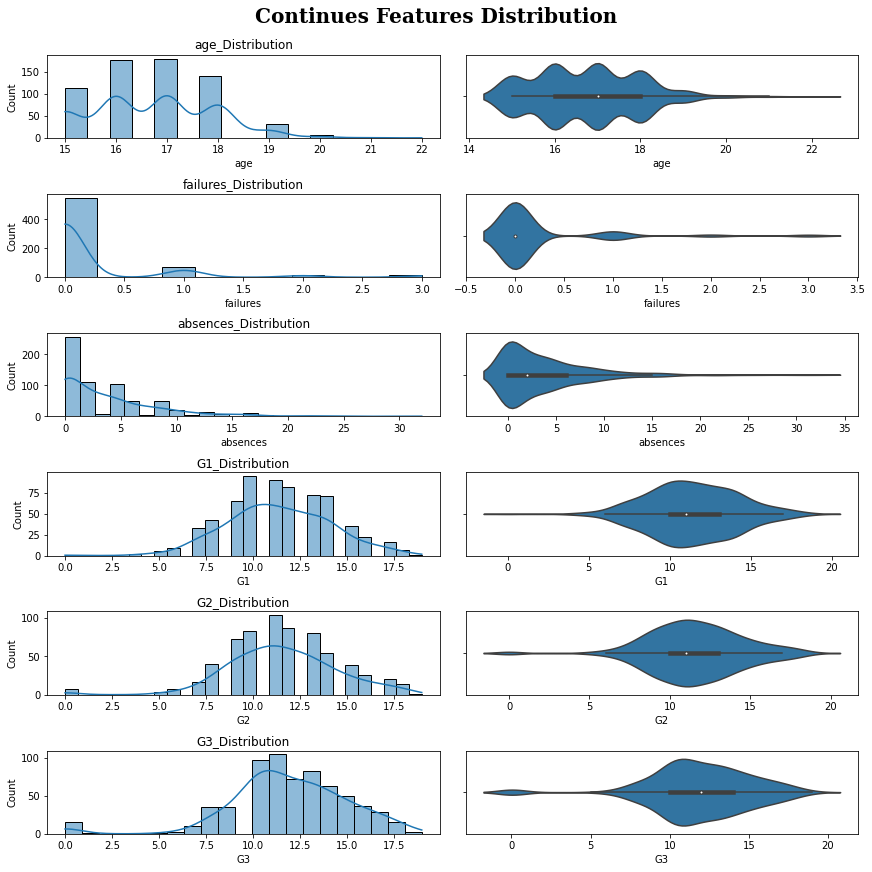

In [ ]:
cont_columns = ['age','failures','absences','G1','G2','G3']
def hist_violin(df,cols,title='You Forget Your Title!'):
    ncols = len(cols)
    fig,axes = plt.subplots(ncols,2,figsize=(12,ncols*2),constrained_layout=True)
    fig.suptitle(f'{title}',size=20, fontweight='bold', fontfamily='serif')
    #axes=axes.ravel()
    for i in range(len(cols)):
        ax = axes[i][0]
        col = cols[i]
        sns.histplot(x=col,data=df,color=sns.color_palette()[0],ax=ax,kde=True)
        #ax.set_xlabel("")
        ax.set_title(col+'_Distribution')
        ax = axes[i][1]
        sns.violinplot(x=col,data=df,color=sns.color_palette()[0],ax=ax)
hist_violin(df,cont_columns,title='Continues Features Distribution')

## **Observations form Distribution [3, 4, 5]**

The distributions show how complicated the situation is, particularly in mathematics, where one-third of students fail to receive a satisfactory evaluation at the end of the year. Even when we look at the graph with the representation at twenty levels, we can see that the majority of the students receive a barely adequate evaluation and thus are unable to achieve a good level on the subject. The results for the Portuguese are undeniably better; even when looking at the insufficient grades, you can see that they all cluster around the sufficiency, indicating less serious situations. Many boys with zero evaluations are of particular interest; the reason for this has not been specified, but it is likely to indicate some boys who have dropped out of school, so it is critical to understand which factors influenced them the most.




## **Correlation:**
We can easily compute the standard correlation coefficient between every pair of attributes using the *corr()* method because the dataset is not too large. The correlation coefficient can be anywhere between –1 and 1. When the coefficient is close to 1, it indicates a strong positive correlation; when it is close to –1, it suggests a significant negative correlation. Finally, coefficients close to 0 indicate the absence of a linear relationship. Only linear correlations are measured by the correlation coefficient ("if x goes up, then y generally goes up/down"). Nonlinear relationships (e.g., "if x is close to 0, then y generally goes up") may be completely missed.

Text(0.5, 1.0, 'Correlation Heatmap')

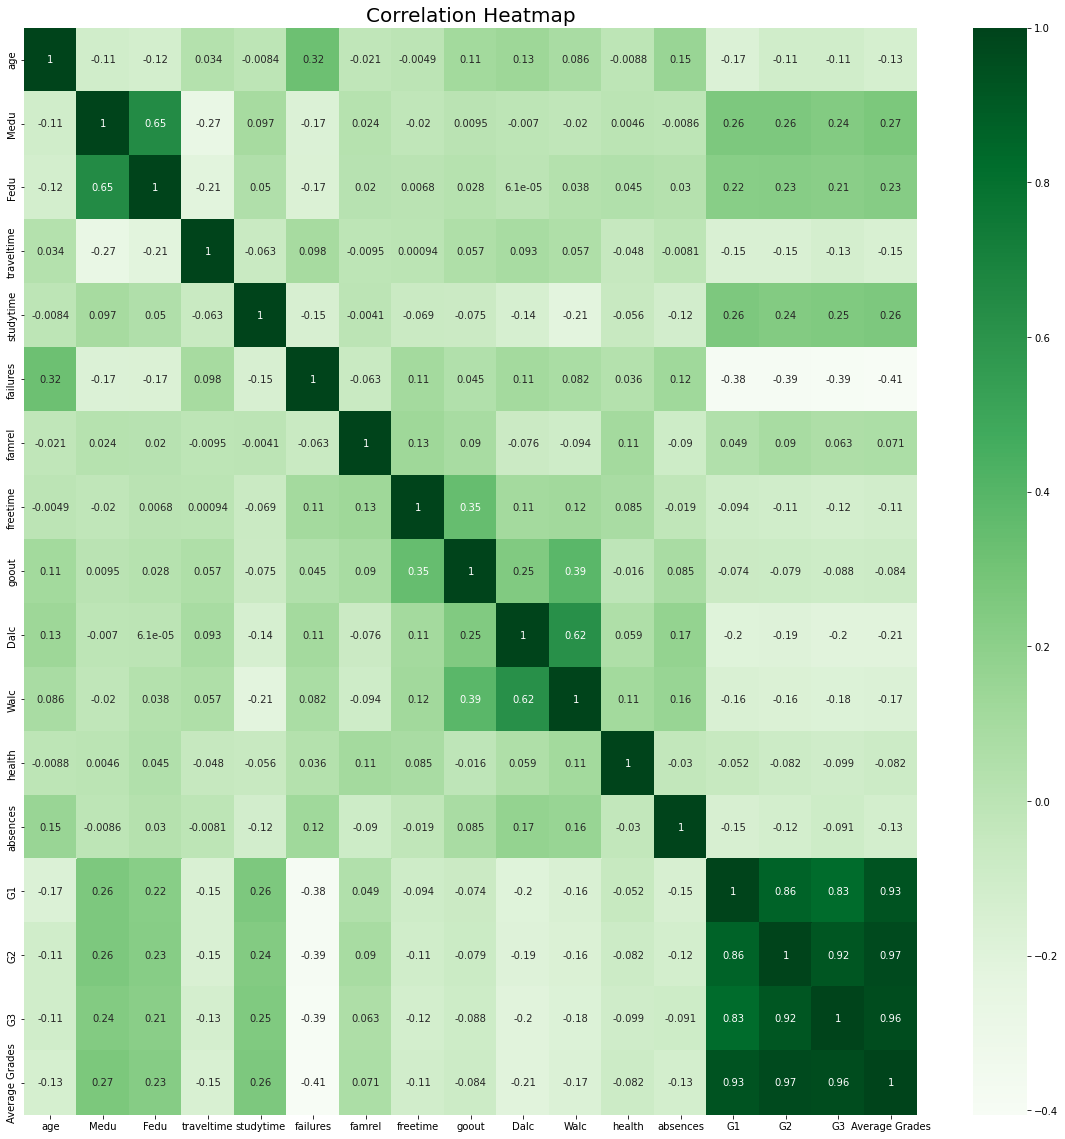

In [ ]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap="Greens")
plt.title('Correlation Heatmap', fontsize=20)

## **Observations form Correlation:**

G1 and G2 had a correlation of 0.83 and 0.92 with G3, respectively. Such a high correlation was expected because it's easy to guess that if a boy gets a good grade throughout the year, he'll pass it. A high positive correlation indicates that the attribute and G3=1 appear frequently in the same record, or that the probability of G3 being positive increases as the value of that attribute rises. A negative correlation, on the other hand, indicates that as the level of a given attribute rises, the final grade is likely to fall short.

Looking at the diagrams, we can see that the number of previous failures is the most negatively correlated value to the final grade, indicating a boy who has already demonstrated academic difficulties. Another common value is age (if the boy is older, he has already experienced failures), and among the positively correlated attributes, we can find the desire to continue studies (higher) and both father and mother's education. The other values differ from one graph to the next, which could indicate that different factors are influencing the trend in different subjects, or that they are values that could change significantly when samples are changed because we are dealing with very low correlations.



## **BoxPlot:**
We are using the boxplot to understand the distribution of the dataset and comparing different attributes. It gives us a good indication of how the values in the data are spread out. Although boxplots may seem primitive in comparison to a histogram or density plot


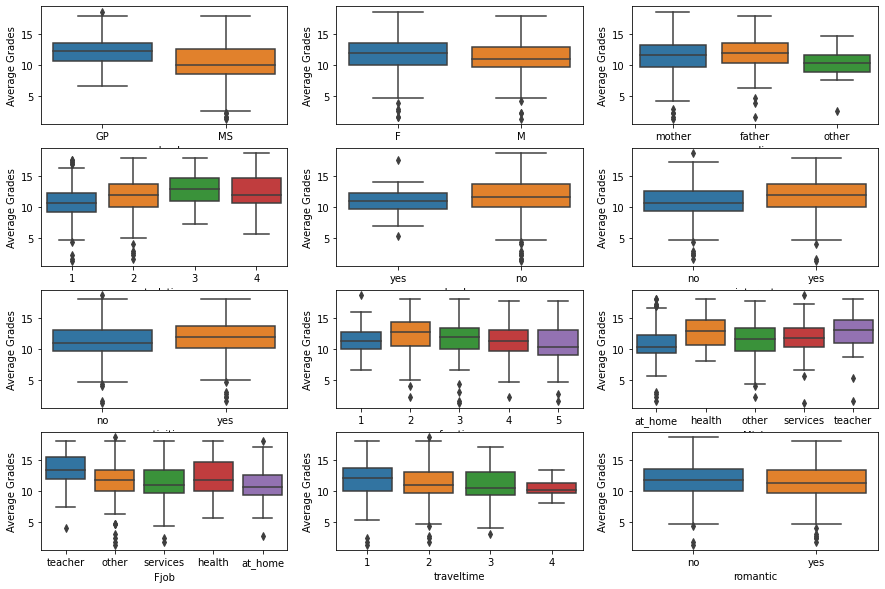

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(4,3,1);
sns.boxplot(x="school", y="Average Grades", data=df)

plt.subplot(4,3,2); 
sns.boxplot(x="sex", y="Average Grades", data=df)

plt.subplot(4,3,3); 
sns.boxplot(x="guardian", y="Average Grades", data=df)

plt.subplot(4,3,4); 
sns.boxplot(x="studytime", y="Average Grades", data=df)

plt.subplot(4,3,5); 
sns.boxplot(x="schoolsup", y="Average Grades", data=df)

plt.subplot(4,3,6); 
sns.boxplot(x="internet", y="Average Grades", data=df)

plt.subplot(4,3,7); 
sns.boxplot(x="activities", y="Average Grades", data=df)

plt.subplot(4,3,8); 
sns.boxplot(x="freetime", y="Average Grades", data=df)

plt.subplot(4,3,9); 
sns.boxplot(x="Mjob", y="Average Grades", data=df)

plt.subplot(4,3,10); 
sns.boxplot(x="Fjob", y="Average Grades", data=df)

plt.subplot(4,3,11); 
sns.boxplot(x="traveltime", y="Average Grades", data=df)

plt.subplot(4,3,12); 
sns.boxplot(x="romantic", y="Average Grades", data=df)

## **Observations (Task2)**

*  The evaluation mean value appears to be inversely related to alcoholic consumption.
*  The evaluation mean rises as study time increases, and the score distribution shifts slightly to the right.

*  If either mother or father is a teacher, the evaluation mean rises above that of other students, and the score distribution shifts slightly to the right.

*  If a student's health deteriorates, the distribution health shifts to the left (score decreases).

*  The evaluation mean is worse if the student's guardian is someone other than his or her father or mother. There is some discrepancy between guardian being the father and guardian being the mother, but the entries of father being the guardian are considerably smaller than the records of mother being the guardian, as most students have their mother as guardian.

* We can see that the highest exam mean value was obtained with the least amount of alcohol consumed during the week. While the weekend consumption does not show a strong trend, we can see that the scores for the same weekend alcohol consumption group increase with study time.

* G1 and G2 had a correlation of 0.83 and 0.92 with G3, respectively.

* This data only has 649 rows, which is considered too few to infer any global trends, but fortunately, it has some strong trends within itself that we discovered through our analysis, and perhaps more are still hidden within the data.





## **Learning from the DataSet, Suitable Models, Significant Feature(s) [6, 7, 8]**

### **Significant Feature(s):**
The dataset contains information on 649 students, each of whom has 34 attributes. The attributes are a mix of categorical word and phrase attributes as well as numeric attributes. These mixed attributes cause a minor issue that must be addressed. Those word and phrase attributes will have to be converted to numbers. 
Some of the attributes, such as the school's name; sex; Mjob, which is the mother's occupation; Fjob, which is the father's occupation; reason; and guardian, are categorical. Others are numerical, such as age and travel time.
The original dataset had two extra features G1 and G2 that corresponded to the first and second periods of school, but they were removed from this one.


### **Suitable Models and Train, Test Ratio:** 
Before we go over the suitable models that were used, we'd like to talk about a method that we used to improve the results. It's the k-Fold Cross-validation method, which allows us to more precisely estimate the test error and then determine which configuration best optimizes the parameters in question. Because the test set is divided into K sets, one of which is used as validation set and the others as train set in each iteration, you get a series of MSE (if we're talking about regression) or accuracies (for classification) of which the average is calculated, resulting in a result that is less dependent on the input data choice.The dataset lends itself to regression and classification analysis; in particular, we decided to treat the dataset differently depending on which model we would use. We'll look at three different types of regression in this section. 70% instances of training data are chosen at random. The remaining 30% instances comprise the test data.

### **Learning from the DataSet:** 
No matter how well-educated a student's parents are, all students are capable of excelling. There is no significant difference in academic performance between men and women. There is no discernible difference in performance between racial or ethnic groups. Overall, this data appears to be fairly straightforward at first glance, but we can begin to ask intriguing questions about it and draw connections between various elements.




# **Task 3**

In [ ]:
#Preparing the dataset for applying Regression
#creating catagorical columns list and numeric columns list
# dataset 1 --> performance in Portuguese language (por)
data_frame_1 = pd.read_csv('/content/drive/MyDrive/Data Science/student-por.csv',sep=";") 
# dataset 2 --> performance in Mathematics (mat)
data_frame_2 = pd.read_csv('/content/drive/MyDrive/Data Science/student-mat.csv',sep=";") 
# merging tow dataset
df = pd.concat([data_frame_1,data_frame_2])
df = df[~df.index.duplicated()]
data_raw = df
cat_columns = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
               'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
print(len(cat_columns))
#Separating G3 for prediction purpose
target = data_raw.pop('G3')
encoded_df = data_raw.copy()
#Creating Encoder
looe = LeaveOneOutEncoder()
#Encoding Catagorical Variables
for col in cat_columns:
    encoded_df[col] = looe.fit_transform(encoded_df[col],target)
data = encoded_df
data.tail()

17


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
644,10.653333333333334,12.25916230366492,19,11.091836734693878,11.81578947368421,11.908450704225352,2,3,12.162962962962963,11.896174863387978,11.55281690140845,11.900881057268723,1,3,1,11.982758620689655,11.672,11.954022988505747,12.111464968152866,11.73228346456693,12.279792746113989,12.177062374245473,12.134474327628363,5,4,2,1,2,5,4,10,11
645,10.626666666666667,12.243455497382199,18,12.2549889135255,12.109947643979057,11.897887323943662,3,1,13.098591549295774,11.605555555555556,11.53169014084507,11.887665198237885,1,2,0,11.972413793103449,12.047858942065492,11.944170771756978,11.705705705705705,11.944230769230769,12.26943005181347,12.164989939637827,12.119804400977996,4,3,4,1,1,1,4,15,15
646,10.657777777777778,12.261780104712042,18,12.270509977827052,11.817982456140351,11.910211267605634,1,1,11.680933852140077,11.898907103825136,11.556338028169014,11.90308370044053,2,2,0,11.98448275862069,11.676,11.955665024630543,12.114649681528663,11.957692307692307,12.281519861830743,11.04,12.136919315403423,1,1,1,1,1,5,6,11,12
647,10.653333333333334,11.41132075471698,17,12.268292682926829,12.141361256544503,11.908450704225352,3,1,12.162962962962963,11.63888888888889,11.55281690140845,11.900881057268723,2,1,0,11.982758620689655,11.672,11.954022988505747,11.723723723723724,11.73228346456693,12.279792746113989,12.177062374245473,12.134474327628363,2,4,5,3,4,2,6,10,10
648,10.648888888888889,11.407547169811322,18,11.08673469387755,12.136125654450261,11.90669014084507,3,2,12.155555555555555,11.89344262295082,11.549295774647888,11.898678414096917,3,1,0,11.98103448275862,11.668,11.952380952380953,11.72072072072072,11.724409448818898,12.278065630397236,12.175050301810865,12.1320293398533,4,4,1,3,4,5,4,10,11


## **Spliting the dataset into train and test set:**

In [ ]:

#Splitting the dataset into train and test set
X_train,X_test,y_train,y_test = train_test_split(data, target,test_size=.2, random_state=0)
print("Number of total record is : ", data.shape[0])
print("The train dataset contains : ", X_train.shape[0])
print("The test dataset contains : ", X_test.shape[0])

Number of total record is :  649
The train dataset contains :  519
The test dataset contains :  130


**We splitted the data set into train and test data with a ratio of .2.
Our dataset contains total records of 649. The train dataset contains 519 record and the test dataset contains 130 record**

## **Information Criteria :**<br/>
Here we define two function for calculating AIC(Akaike's Information Criteria) and BIC(Bayesian Information Criteria). These are a set of metrics that measures the fit of the model to observations given the number of parameters used in the model.<br/>
Below are the two information criteria formula for  Akaike’s
Information Criterion and Bayes Information Criterion
<center>$AIC ≈ n · ln(MSE) + 2*J$<br/>
$BIC ≈ n · ln(MSE) + J * ln(n)$<br/></center>

In [ ]:
# calculate aic for regression
def calculate_aic(n, mse, num_params):
	aic = n * log(mse) + 2 * num_params
	return aic

# calculate bic for regression
def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic

#We will evaluate our regression models by these metrices
evaluation_metrics = ['MAE','MSE','RMSE','R2_Square','AIC','BIC']
model_performance = pd.DataFrame(columns=evaluation_metrics,)

## **Models** 

### **Linear Regression:**<br/>
Linear regression finds the linear relationship between the dependent variable and one or more independent variables using a best-fit straight line. Generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term). In this technique, the dependent variable is continuous, the independent variable(s) can be continuous or discrete, and the nature of the regression line is linear. Mathematically, the prediction using linear regression is given as:
$$y = \theta_0 + \theta_1x_1 + \theta_2x_2 + … + \theta_nx_n$$

Here, $y$ is the predicted value,

$n$ is the total number of input features,

$x_i$ is the input feature for $i^{th}$ value, 

$\theta_i$ is the model parameter ($\theta_0$ is the bias and the coefficients are $\theta_1, \theta_2, … \theta_n$).

The coefficient is like a volume knob, it varies according to the corresponding input attribute, which brings change in the final value. It signifies the contribution of the input variables in determining the best-fit line.<br/>
Bias is a deviation induced to the line equation $y = mx$ for the predictions we make. We need to tune the bias to vary the position of the line that can fit best for the given data.

In [ ]:
def linear_regressor():
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2_square = metrics.r2_score(y_test, y_pred)
    aic = calculate_aic(len(y_train),mse,len(model.coef_)+1)
    bic = calculate_bic(len(y_train),mse,len(model.coef_)+1)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print("AIC : ",aic)
    print("BIC : ",bic)
    print('__________________________________')
    print('__________________________________')
    print(stats.summary(model,X_train,y_train,xlabels=X_train.columns))

    return mae, mse, rmse, r2_square, aic, bic

### **Ridge Regression:**<br/>
Ridge regression is a regression technique that is quite similar to unadorned least squares linear regression: simply adding an $\ell_2$ **penalty** on the parameters $\beta$ to the objective function for linear regression yields the objective function for ridge regression.

Our goal is to find an assignment to $\beta$ that minimizes the function

$$f(\beta) = \|X\beta - Y\|_2^2 + \lambda \|\beta\|_2^2,$$

where $\lambda$ is a hyperparameter and, as usual, $X$ is the training data and $Y$ the observations. In practice, we tune $\lambda$ until we find a model that generalizes well to the test data.

Ridge regression is an example of a shrinkage method: compared to least squares, it shrinks the parameter estimates in the hopes of reducing variance, improving prediction accuracy, and aiding interpetation.

In [ ]:
def ridge_regressor():
    model = Ridge()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2_square = metrics.r2_score(y_test, y_pred)
    aic = calculate_aic(len(y_train),mse,len(model.coef_)+1)
    bic = calculate_bic(len(y_train),mse,len(model.coef_)+1)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print("AIC : ",aic)
    print("BIC : ",bic)
    print('__________________________________')
    print('__________________________________')
    print(stats.summary(model,X_train,y_train,xlabels=X_train.columns))
    return mae, mse, rmse, r2_square, aic, bic

### **Support Vector Regression(SVR):**<br/>
Support Vector Regression (SVR) uses the same principle as SVM, but for regression problems. The problem of regression is to find a function that approximates mapping from an input domain to real numbers on the basis of a training sample.SVR has an additional tunable parameter ε (epsilon). The value of epsilon determines the width of the tube around the estimated function (hyperplane). Points that fall inside this tube are considered as correct predictions and are not penalized by the algorithm.<br/>
The support vectors are the points that fall outside the tube rather than just the ones at the margin, as seen in the SVM classification example.
Finally, “slack” (ξ ) measures the distance to points outside the tube, and you can control how much you care about it by tuning a regularization parameter C (more about it in the Python section below).<figure>
<center>
<img width="400",height="350" src='https://miro.medium.com/max/875/1*_IWq-IN-R7sFy0Snv2iJdg.png' />
<figcaption>Support Vector Regression — hyperplane line together with boundary lines defined by +-epsilon</figcaption></center>
</figure>

The algorithm's goal is to minimize the error by identifying a function that puts more of the original points inside the tube while at the same time reducing the “slack.”
While the above explanations focus on linear examples, SVM and SVR algorithms can also handle non-linear situations through a kernel trick.

In [ ]:
def support_vector_regressor():
    model = SVR(C=.2, epsilon=0.2, kernel='poly', degree=4)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2_square = metrics.r2_score(y_test, y_pred)
    aic = calculate_aic(len(y_train),mse,len(model.get_params()))
    bic = calculate_bic(len(y_train),mse,len(model.get_params()))
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print("AIC : ",aic)
    print("BIC : ",bic)
    print('__________________________________')
    print('__________________________________')
    return mae, mse, rmse, r2_square, aic, bic

### **Multiple Linear Regression (Output)**

In [ ]:
mae, mse, rmse, r2_square, aic, bic = linear_regressor()
model_performance = model_performance.append(pd.Series({'MAE':mae ,'MSE':mse ,'RMSE':rmse ,'R2_Square':r2_square,'AIC':aic,'BIC':bic},name="Linear Regression"))

MAE: 0.7737893028527681
MSE: 1.0792763509357999
RMSE: 1.0388822603817045
R2 Square 0.8480728132636851
AIC :  105.59491021416005
BIC :  245.90773835863436
__________________________________
__________________________________
Residuals:
    Min     1Q  Median      3Q     Max
-2.8401 9.7991 11.7167 13.8346 19.7269


Coefficients:
             Estimate  Std. Error  t value  p value
_intercept 349.524504   63.414113   5.5118      0.0
school        0.07104      0.0684   1.0386 0.299478
sex          0.265799    0.143148   1.8568 0.063905
age         -0.020708    0.046647  -0.4439 0.657273
address      0.141225    0.110482   1.2783 0.201732
famsize      0.200901    0.357241   0.5624 0.574108
Pstatus    -28.607103    1.339745 -21.3526      0.0
Medu         -0.06652    0.069654   -0.955 0.340019
Fedu         0.047003    0.065694   0.7155 0.474635
Mjob         0.074173    0.103714   0.7152 0.474825
Fjob        -0.141704    0.124746  -1.1359 0.256509
reason      -0.014528    0.085199  -0.1705 0.86

### **Support Vector Regression (Output)**

In [ ]:
mae, mse, rmse, r2_square, aic, bic = support_vector_regressor()
model_performance = model_performance.append(pd.Series({'MAE':mae ,'MSE':mse ,'RMSE':rmse ,'R2_Square':r2_square,'AIC':aic,'BIC':bic},name="SVR"))

MAE: 0.6861556709314437
MSE: 0.8165278342396743
RMSE: 0.9036192971819904
R2 Square 0.8850593023368221
AIC :  -83.1983299981682
BIC :  -36.427387283343435
__________________________________
__________________________________


### **Ridge Regression (Output)**

In [ ]:
mae, mse, rmse, r2_square, aic, bic = ridge_regressor()
model_performance = model_performance.append(pd.Series({'MAE':mae ,'MSE':mse ,'RMSE':rmse ,'R2_Square':r2_square,'AIC':aic,'BIC':bic},name="Ridge Regression"))

MAE: 0.7477182486534852
MSE: 0.9859772674029367
RMSE: 0.9929638802106231
R2 Square 0.861206305231645
AIC :  58.67069237088844
BIC :  198.98352051536276
__________________________________
__________________________________
Residuals:
    Min     1Q  Median      3Q     Max
-0.3429 9.8076 11.6493 13.8886 19.8062


Coefficients:
            Estimate  Std. Error  t value  p value
_intercept 22.915002   65.053588   0.3522 0.724795
school      0.088641    0.070168   1.2633 0.207063
sex          0.16511    0.146848   1.1244 0.261381
age        -0.003862    0.047853  -0.0807  0.93571
address     0.130021    0.113339   1.1472 0.251833
famsize     0.079808    0.366477   0.2178 0.827694
Pstatus    -1.542368    1.374382  -1.1222 0.262286
Medu       -0.081116    0.071455  -1.1352 0.256811
Fedu        0.042239    0.067392   0.6268 0.531095
Mjob        0.081789    0.106395   0.7687 0.442405
Fjob       -0.148414    0.127971  -1.1597 0.246686
reason     -0.001153    0.087401  -0.0132  0.98948
guardian  



*   **Number of total record is :  649**
*   **The train dataset contains :  519**
*   **The test dataset contains :  130**



### **A Story about from the DataSet:**<br/>
There are a total of 32 attributes/predictors in the dataset all the attributes are related to Student Performance. But all these features are not important for improving the performance of a student, applying three types of regression, we found that only 3 of the 32 features play a significant role in enhancing a student's performance. Now if we want to improve the educational qualifications or performance of the children of any educational institution or different school-college then if we work with all these features then good results will surely be obtained. What is more important than the occupation of a student's parents is how much time the student spends studying or how much time he / she is traveling or his / her health condition or whether he / she is attending school regularly or not. Finally we can say that if we want to work with the children of any educational institution, school or college and their performance is to work with their educational qualifications or their attention then we must be more concerned about these 8 to 10 features than other features.

### **Significance of The Predictors:**<br/>
There are total 32 predictors in the dataset. In linear regression model among the 32 predictors only 8 predictors have the p-value <= 0.5. So we can say that the output of the Linear regression model prediction highly depend on this 8 predictors.<br/>
In ridge regression model there are also 8 predictors having the p-value <= 0.5. Here also the output of the model is highly dependent on this 8 predictors.

In [ ]:
sortting = 'MAE'
display(model_performance.sort_values(sortting))

,MAE,MSE,RMSE,R2_Square,AIC,BIC
SVR,0.6861556709314437,0.8165278342396743,0.9036192971819904,0.8850593023368221,-83.1983299981682,-36.427387283343435
Ridge Regression,0.7477182486534852,0.9859772674029367,0.9929638802106231,0.861206305231645,58.67069237088844,198.98352051536276
Linear Regression,0.7737893028527681,1.0792763509357999,1.0388822603817045,0.8480728132636851,105.59491021416005,245.90773835863436


## **Comparison of 3 Models:**
From the comparison of above metrices we can say that the SVR model with kernel polynomial performs better on this dataset. Its R-squared(The higher the R-2 the better the model) is maximu among all the predictors,MAE(mean absolute error) is smaller than all others, MSE(mean squared error) is smaller than all others.

###**Best Model:**<br/>
For choosing the best model we used AIC and BIC. We know that the smaller the AIC or BIC, the better the model. From tha above interpretations we observed that among all the regressors SVR has the lowest AIC and BIC.
So, In our observations SVR is the best model for this dataset.

## **Conclusions:**

This given dataset is based on student achievement at two Portuguese secondary schools. Student grades, demographic, social, and **school-related characteristics** were gathered using school reports and questionnaires. There are two datasets available, one for mathematics (mat) and the other for performance in Portuguese (por). Binary/five-level classification and regression tasks were used to model both datasets. We have carefully observer the given dataset and found that **the dataset about Portuguese language and  Mathematics has no missing values.**

After dealing with missing/null values, we worked on data visualization, we applied different types of distribution like the **normal distribution, visual distribution, Continues Features Distribution**. We've applied **correlations between attributes** and seen how each feature depends on another. we've also drawn the box plot to understand the distribution of the dataset and compare different attributes. In the upper section of our notebook, we've described in detail about the findings and observation. 

After using different types of data visualization distribution correlations and different types of plots we have closely observed the dataset and discussed which model would be suitable for the given dataset and divided our datasets into **training and test ratios**.

We implemented three linear regression models for task 3 **(Multiple Linear Regression, Support Vector Regression, Ridge Regression)**, trained them on our dataset, tested them with test data, and evaluated them using several evaluation metrics**(MAE, MSE, R2)**. The Support Vector Regression model performed the best out of all the models. Finally, based on the **information criterion(AIC, BIC)**, we chose the Support Vector Machine as the best model.